netflix is know for its work in data science, AI and ML particularly for building strong recommendation models and algorithms
that understand customer behaviour and patterns.
suppose you are working in a data_Driven job role and you have a dataset of more than 9000 movies. you need to solve the following 
questions to help the company make informed bussiness decisions accordingle.

## 1) What is the most frquest genre of movies released on netflix?

## 2) What genres has highest votes?

## 3) Which movie got the highest popularity? Whats its genre?

## 4) Which movie got the lowest popularity? Whats its genre?

## 5) Which year has the most filmmed movies?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'mymoviedb.csv',lineterminator='\n')

In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


## check if any duplicate values in our dataset?

In [16]:
df.duplicated().sum()

0

## Got it there is no duplicated movie in this set

### check basic statistics 

In [19]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


## Exploration Summary

. We have a dataframe consisting of 9287 rowns and 9 columns.
. Our dataset looks a bit tidy with no NaNs or Duplicated values.
. Realease_Date column needs to be casted into datetime and to extrat only the year value.
. Overview, Original_Language And Poster URL wouldn't be so usefull during analysis, so we will drop them.
. There is noticeable outliers in popularity column.
. Vote_Average beter be categorised for proper analysis.
. Genre column has comma seperated values and white spaces that needs to be handled  and casted into category.Exploration summary.

##  we would change the datatype of Release_Date column from object to datetime and we need only years

In [22]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [23]:
print(df['Release_Date'].dtypes)

datetime64[ns]


# we want years at the place of date so we convert dates into only years as removing month and days.

In [25]:
df['Release_Date'] = df['Release_Date'].dt.year

In [26]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Now we performing the operation of removing the overview,original language and url columns

In [34]:
cols = ['Overview','Original_Language','Poster_Url']

In [35]:
df.drop(cols,axis=1,inplace=True)

In [36]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


## Categorize Vote_Average column
we would cut the Vote_Average values and make four categories: popular,average,below_average,not_popular to describe it more using
categorize_col() function provided above.

In [38]:
def categorize_col(df,col,labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col],edges ,labels = labels,duplicates = 'drop')
    return df

In [39]:
labels = ['not_popular','below_avg','avg','popular']
categorize_col(df , 'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'avg' < 'popular']

In [40]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,avg,"Action, Adventure, Thriller, War"


In [41]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
avg            2412
below_avg      2398
Name: count, dtype: int64

In [42]:
df.dropna(inplace = True)

In [43]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [44]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,avg,"Action, Adventure, Thriller, War"


## we would split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [46]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


## Casting column into categories

In [48]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [50]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [51]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visualization

In [68]:
sns.set_style('whitegrid')

## 1) What is the most frquest genre of movies released on netflix?

In [70]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

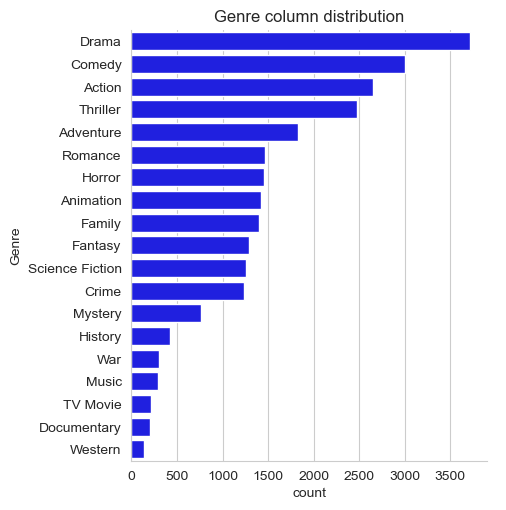

In [71]:
sns.catplot(y = 'Genre', data = df,kind = 'count',order=df['Genre'].value_counts().index,color = 'blue')
plt.title('Genre column distribution')
plt.show()

## 2) What genres has highest votes in vote_Average column?

In [73]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


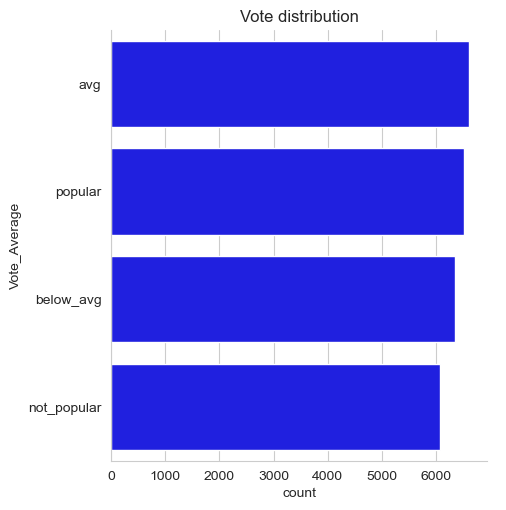

In [74]:
sns.catplot(y = 'Vote_Average',data = df , kind = 'count',order = df['Vote_Average'].value_counts().index ,color = 'blue')
plt.title('Vote distribution')
plt.show()

In [77]:
df['Vote_Average'].value_counts()

Vote_Average
avg            6613
popular        6520
below_avg      6348
not_popular    6071
Name: count, dtype: int64

## 3) Which movie got the highest popularity? Whats its genre?

In [79]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [80]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


## 4) Which movie got the lowest popularity? Whats its genre?

In [119]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,avg,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,avg,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,avg,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


## 5) Which year has the most filmmed movies?

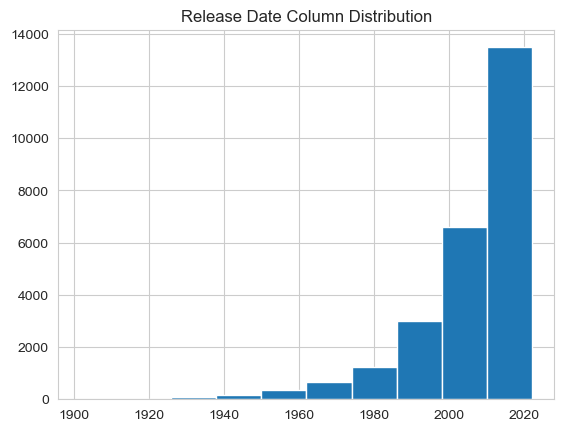

In [123]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

# Conclusion
## 1) What is the most frquest genre of movies released on netflix?
Drama genre is the most frquent genre in our dataset and has appeared more than 14% of the times among 19 ither genres.
## 2) What genres has highest votes?
we have 25.5% of our dataset with popular vote(6520 rows).Dram again gets the higest popularity among fans by being having more than 18.5% of movies popularities.
## 3) Which movie got the highest popularity? Whats its genre?
Spider man:No way home has the higest popularity  rate and it as genres of Action,Adventure and science fiction.
## 4) Which movie got the lowest popularity? Whats its genre?
The united states threads has the highest lowest rate t as genres of music,drama, war and scific
## 5) Which year has the most filmed movies?
year 2020